# Graphs for performance evaluation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## Initial training with unbalanced dataset and no data augmentation

In [2]:
score_unbalanced = pd.read_json("06-12-2023_mtm_with_bert_27_120_adam_32_16_with_regularization_history.json")

In [3]:
score_unbalanced

,loss,emotion_output_loss,toxicity_output_loss,emotion_output_accuracy,emotion_output_precision,emotion_output_recall,emotion_output_em_auc,toxicity_output_accuracy,toxicity_output_precision,toxicity_output_recall,...,val_emotion_output_loss,val_toxicity_output_loss,val_emotion_output_accuracy,val_emotion_output_precision,val_emotion_output_recall,val_emotion_output_em_auc,val_toxicity_output_accuracy,val_toxicity_output_precision,val_toxicity_output_recall,val_toxicity_output_to_auc
0,4.097592,1.681697,1.687538,0.271001,0.000000,0.000000,0.500265,0.487629,0.656250,0.003021,...,1.644899,1.620477,0.263370,0.000000,0.000000,0.618428,0.534790,0.794366,0.324324,0.617324
1,3.561247,1.455790,1.397448,0.459868,0.583039,0.023734,0.699783,0.642693,0.887432,0.350403,...,1.407074,1.312141,0.481311,0.557998,0.262795,0.727131,0.676251,0.865443,0.488212,0.783019
2,3.109179,1.254358,1.164176,0.538119,0.664755,0.250144,0.768507,0.729862,0.862024,0.566168,...,1.267186,1.193278,0.543416,0.682927,0.322024,0.781857,0.709603,0.809302,0.600345,0.793780
3,2.867397,1.138659,1.054451,0.599252,0.709309,0.366082,0.812506,0.754171,0.848662,0.625144,...,1.225628,1.134157,0.564692,0.693764,0.358252,0.782117,0.727430,0.844934,0.551466,0.785190
4,2.702455,1.081113,0.962458,0.630178,0.714996,0.434120,0.833879,0.764528,0.866028,0.662975,...,1.197078,1.057684,0.588844,0.672332,0.409431,0.807924,0.729730,0.839729,0.641748,0.838541
5,2.554878,1.025899,0.884601,0.642549,0.732939,0.498993,0.851287,0.781646,0.881450,0.685558,...,1.211081,0.956595,0.581369,0.643974,0.402530,0.810158,0.750431,0.859198,0.652674,0.854296
6,2.434729,0.982883,0.821845,0.666283,0.749137,0.530926,0.864548,0.794160,0.880065,0.706128,...,1.194837,0.973784,0.597470,0.650037,0.502013,0.808761,0.740081,0.843195,0.655549,0.854007
7,2.325989,0.944285,0.765516,0.672325,0.755189,0.559983,0.873394,0.811421,0.887965,0.706847,...,1.197981,0.945445,0.583094,0.648036,0.493387,0.817901,0.763657,0.859704,0.634273,0.884326
8,2.266693,0.922796,0.741658,0.676352,0.748632,0.590334,0.880021,0.815880,0.890703,0.713895,...,1.184083,0.881324,0.585969,0.652726,0.502588,0.813546,0.763657,0.867534,0.651524,0.877529
9,2.173634,0.888428,0.696151,0.691024,0.752138,0.594505,0.889777,0.827532,0.896892,0.718211,...,1.182257,0.891680,0.602645,0.647970,0.504888,0.825890,0.771708,0.863433,0.665325,0.850663


#### Loss vs. Epochs

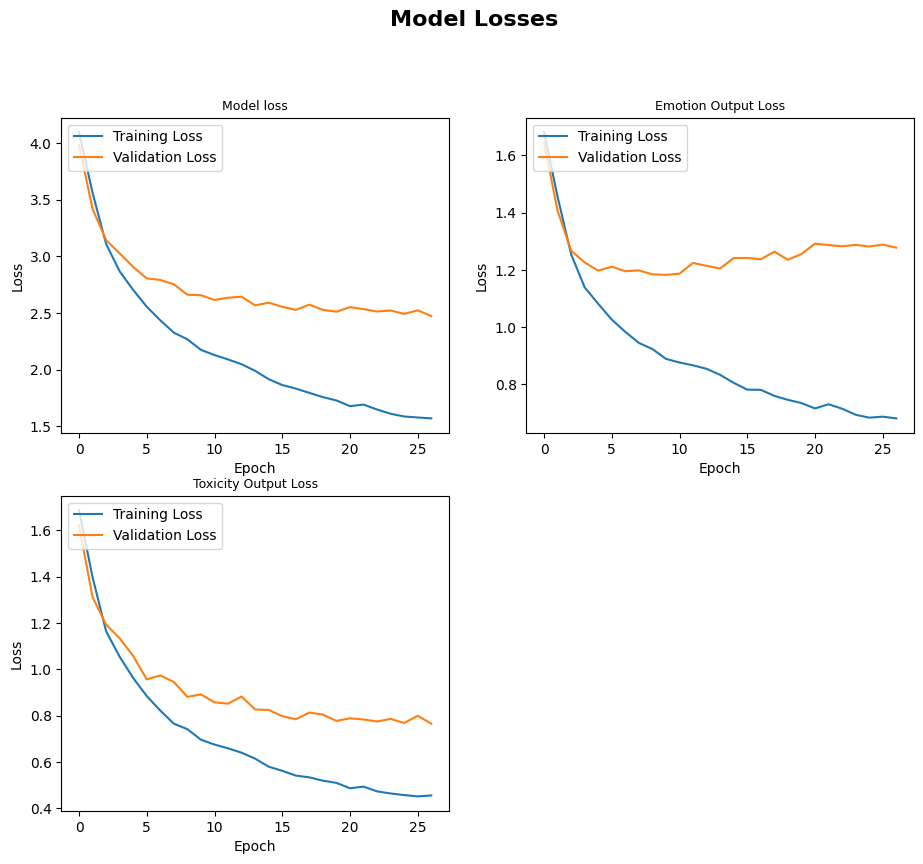

In [9]:
# Plot training & validation loss values
fig = plt.figure(figsize=(11, 9))
fig.suptitle('Model Losses', fontsize=16, y=1.0, fontweight='bold')

ax = fig.add_subplot(2, 2, 1)
ax.plot(score_unbalanced['loss'])
ax.plot(score_unbalanced['val_loss'])
ax.set_title('Model loss',fontsize=9)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Training Loss', 'Validation Loss'], loc='upper left')

ax = fig.add_subplot(2, 2, 2)
ax.plot(score_unbalanced['emotion_output_loss'])
ax.plot(score_unbalanced['val_emotion_output_loss'])
ax.set_title('Emotion Output Loss', fontsize=9)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Training Loss', 'Validation Loss'], loc='upper left')

ax = fig.add_subplot(2, 2, 3)
ax.plot(score_unbalanced['toxicity_output_loss'])
ax.plot(score_unbalanced['val_toxicity_output_loss'])
ax.set_title('Toxicity Output Loss', fontsize=9)
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.legend(['Training Loss', 'Validation Loss'], loc='upper left')



#### Accuracy vs. Epochs

In [ ]:
# Plot training & validation accuracy values
fig = plt.figure(figsize=(11, 9))
fig.suptitle('Model Accuracy', fontsize=16)

ax = fig.add_subplot(2, 2, 1)
ax.plot(score_unbalanced[''])